Schrodinger's Equation
==========================================

An example of solving a differential equation numerically.

References:
* [wikipedia: Numerical Methods for ordinary differential equations](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations)
* [wikipedia: Nondimensionalization]( https://en.wikipedia.org/wiki/Nondimensionalization)
* [wikipedia: Schrödinger equation](https://en.wikipedia.org/wiki/Schr%C3%B6dinger_equation)
* [wikipedia: Quantum Harmonic Oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator)
* [Jupyter notebooks](http://jupyter.org/install) - a python environment for numerical work

Jim Mahoney | Jan 2018 

Schrodinger's equation for the position of a particle in a potential energy well is

$$ - \frac{\hbar^2}{2m}  \frac{d^2}{dx^2} \psi(x) + V(x) \psi(x) = E \psi(x) $$

where $ \psi(x) $ is the wavefunction , $ x $  is position in meters ,
$ \hbar = h/2\pi $ where $h$ is Plank's constant , $m$ is the mass in kg ,
$V(x)$ is the potential energy in Joules, and $E$ is the total energy,
also in Joules.

Putting this version of Schrodinger's equation in a computer program is a bad idea, 
since the numbers will be tiny ( $\hbar = 1.0545718 10^-34 \, m^2 kg / s $) and there 
are a bunch of constants. 

So the first step is to find some dimensionless variables to use instead, putting
the whole thing into a simpler, more generic form in which the variables are of order 1.

The dependent variable $x$ is the first to go. Define a dimesionless length $s$ in terms of a length scale $L$, 

$$ x = s \, L $$

then we have

$$ - \frac{\hbar^2}{2m}  \frac{d^2}{d(sL)^2} \psi(x) + V(x) \psi(x) = E \psi(x) $$

What's left has units of energy on each term. So we define an energy scale

$$ E_0 = \frac{\hbar^2}{2m\,L^2} $$

and use that to get dimensionless versions of $V(x)$ and $E$, which I'll call $u(x)$ and $\epsilon$.

$$ 
V(x) = E_0 u(x) \\
E = E_0 \epsilon
$$

Rearranging the terms of the original equation and collecting leaves us with

$$ \frac{d^2}{ds^2} \psi(s) = \left[ u(s) - \epsilon \right] \, \psi(s) $$ .

Putting this on a discrete lattice of points with a finite $\Delta s$  between
$s$ values

$$ s_n = n \, \Delta s $$

then the wavefunction is $ \psi = [\psi_1, \psi_2, ... \psi_n] $ and the second derivative is

$$ \frac{d^2 \psi}{ds^2}  =  \frac{1}{\Delta s}\left[ \frac{ (\psi_{n+1} - \psi_n )}{ \Delta s } - \frac{ (\psi_{n} - \psi_{n-1} )}{ \Delta s } \right] =  \frac{ (\psi_{n+1} - 2 \psi_n + \psi_{n-1} )}{ {\Delta s}^2 }  $$

which gives

$$ \psi_{n+1} =  2 \psi_{n} - \psi_{n-1} +  {\Delta s}^2 \left[ u_n - \epsilon \right] \, \psi_n $$

That is the equation that we can solve numerically, computing each value of $\psi$ from the previous two.

To go any further we need to pick a potential energy function $u(s)$.

I'll do one of the best known, the harmonic oscillator , $ u(s) = s^2 $ ,
leaving us with this equation to solve :

$$ \frac{d^2}{ds^2} \psi(s) = \left[ s^2 - \epsilon \right] \, \psi(s) $$ .

One other thing - the square of the wavefuction , $|\psi(x)|^2$ , is the probability that the particle is at position $x$. Since all the probalities need to sum to 1, $\psi$ must satisfy

$$ \int_{-\infty}^\infty |\psi(x)|^2 = 1 $$

The problem then is to see if we can find solutions that can satisfy both of these equations. It turns out that only some values for the energy $\epsilon$ will work. We will end up solving for energies $\epsilon_n$ and wavefunctions $\psi_n(s)$ which are the quantized energy levels and what are called "stationary states" of the harmonic oscillator, where $n$ is an integer which labels the state.

What we're solving for essentially is the configuration of one electron attached to a really, really tiny spring which can move back and forth in one direction. In the quantum world, that electron can only exist in a stable configuration if it has one of these energies. 


In [1]:
# Install the python packages we'll use later.
from numpy import *
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import numpy as np
import sys
% matplotlib inline

# What version of python is this?
print sys.version

2.7.13 |Continuum Analytics, Inc.| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


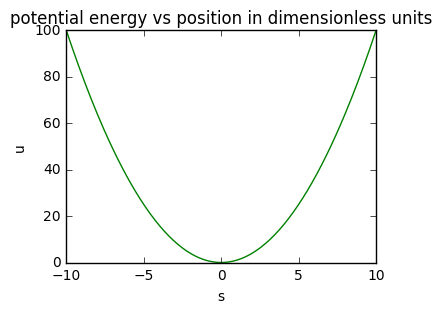

In [2]:
# What does the potential look like? I'm glad you asked.

# First set up arrays of numbers for the x and y axis.
s = np.linspace(-10, 10, 200)  # distance : 265 values evenly spread from -10 to 10.
u = s**2                       # potential energy

# Then make a picture.
plt.figure(dpi=200, figsize=(4, 3))  # plot size in inches
plt.title("potential energy vs position in dimensionless units")
plt.xlabel("s")
plt.ylabel("u")
plt.plot(s, u, 'g')  # g means "green"
plt.show()


Now we pick a value for the energy and see if we can make things work.

Since the potential and Schrodinger's equation are symmetric about $s=0$, 
we'll look for solutions which also have that symmetry. One way to do that is to start at $s=0$ with $\frac{d\psi}{ds}=0$.

A physically valid wavefunction will taper off nicely to 0 for large and small values.
If it doesn't, then the total probability can't be 1.

The lowest possible energy is $\epsilon = 0$. We'll start at a value near that.

In [3]:
# Initialize s, u, and psi, all as lists of N values.

N = 1000        # number of points in discrete grid
s_max = 4.0        # maximum value of s

s = np.linspace(0.0, s_max, N)
ds = s[1] - s[0]
s = s - ds/2.0         # Make the 1st two values symmetric around s=0

u = s**2                        # The potential energy at those values for s.

print "First few values of s are ", s[0:4]
print "First few values of u are ", u[0:4]

First few values of s are  [-0.002002    0.002002    0.00600601  0.01001001]
First few values of u are  [  4.00801202e-06   4.00801202e-06   3.60721081e-05   1.00200300e-04]


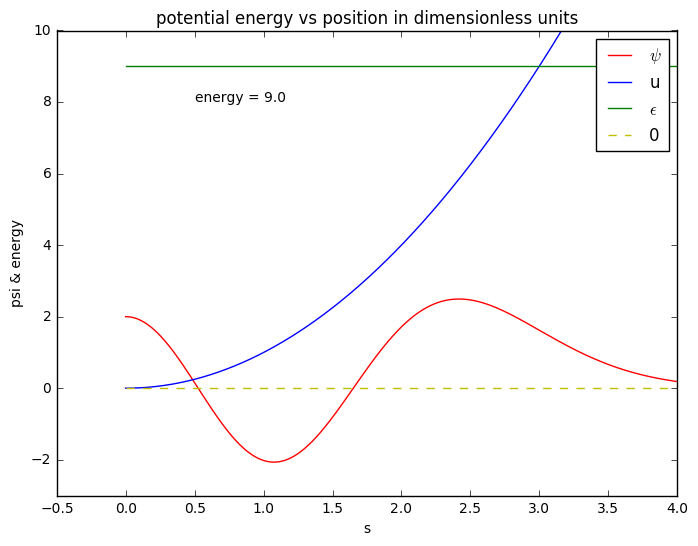

In [4]:
# Pick a value for the energy
energy = 9.0

# Initialize psi.
psi = np.zeros(N)               # Allocate space for the wavefunction, all 0 to start
psi[0] = psi[1] = 2.0           # Set first two values of psi so that d(psi)/ds = 0  ,  psi(s) = psi(-s)

# Iterate over the difference equation to find the rest of the psi values.
for i in range(1, N-1):
    psi[i+1] = 2*psi[i] - psi[i-1] + ds**2 * ( u[i] - energy   ) * psi[i]
    
# Then make a picture.
plt.figure(dpi=200, figsize=(8,6))  # plot size in inches
plt.title("potential energy vs position in dimensionless units")
plt.xlabel("s")
plt.ylabel("psi & energy")
plt.text(0.5, 8, "energy = "+str(energy))
plt.ylim((-3.0, 10.0))
plt.plot(s, psi, 'r')  # r => red
plt.plot(s, u, 'b')    # b => blue
plt.plot(s, energy*np.ones(N), 'g')  # g => green
plt.plot(s, np.zeros(N), 'y--')
plt.legend(["$\psi$", "u", "$\epsilon$", 0])
plt.show()


In class I will explore this situation by varying the varlue for the energy and then re-evaluating the last cell.

It turns out that the energies which will work with a wavefunction with this symmetry are [1, 5, 9, 13, ...] .

When $ u < \epsilon $ , $\psi$ oscillates sinusoidally. That's what happens near $s=0$, until the blue and green curves crosss.

When $ u > \epsilon $ (which is "classically forbidden"), the wavefunction is an exponential, somthing like $ A e^s + B e^{-s}$.  

By increasing the energy and examining the behavior, at the special values for the energies the wavefunction behaves nicely for large values of $s$. 

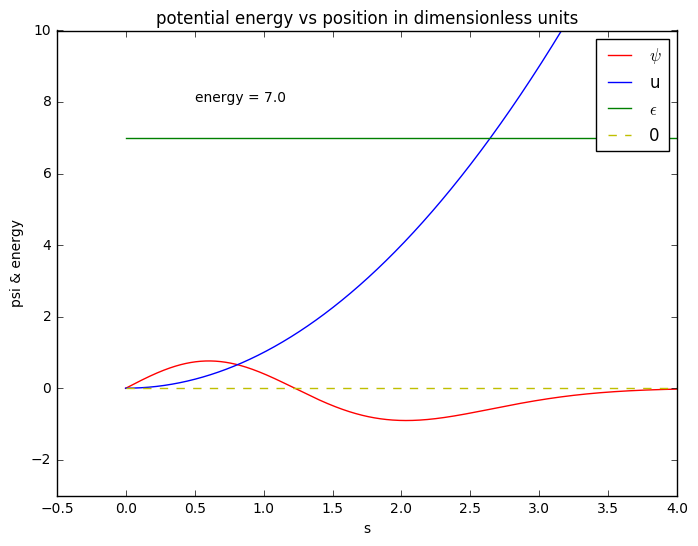

In [5]:
# There is one more set of solutions, ones in which the wavefunction is antisymmetric. 
# That is, psi(s) = - psi(-s)
#
# Turns out that for this shape, the allowed energies are (3, 7, 11, ...)

energy = 7.0

psi = np.zeros(N)        # Allocate space for the wavefunction, all 0 to start
psi[0] = -ds             # Set first two values of psi so that psi(0) = 0  ;  psi(s) = psi(-s)
psi[1] = ds

# Iterate over the difference equation to find the rest of the psi values.
for i in range(1, N-1):
    psi[i+1] = 2*psi[i] - psi[i-1] + ds**2 * ( u[i] - energy   ) * psi[i]
    
# Then make a picture.
plt.figure(dpi=200, figsize=(8,6))  # plot size in inches
plt.title("potential energy vs position in dimensionless units")
plt.xlabel("s")
plt.ylabel("psi & energy")
plt.text(0.5, 8, "energy = "+str(energy))
plt.ylim((-3.0, 10.0))
plt.plot(s, psi, 'r')  # g means "green"
plt.plot(s, u, 'b')
plt.plot(s, energy*np.ones(N), 'g')
plt.plot(s, np.zeros(N), 'y--')
plt.legend(["$\psi$", "u", "$\epsilon$", 0])
plt.show()


Putting all this together, we find that there are solutions for $\epsilon_n = 1 + 2 \, n $.

The corresponding wavefunctions are symmetric and antisymmetric, alternating. These are harmonics, like the harmonic overtones of a vibrating guitar string.

In terms of the original physics problem, the energies are $E_n = (1 + 2 \, n)(\hbar \omega /2) $ where $\omega$ is the classical angular frequency of oscillation.


Are we having fun yet?

------

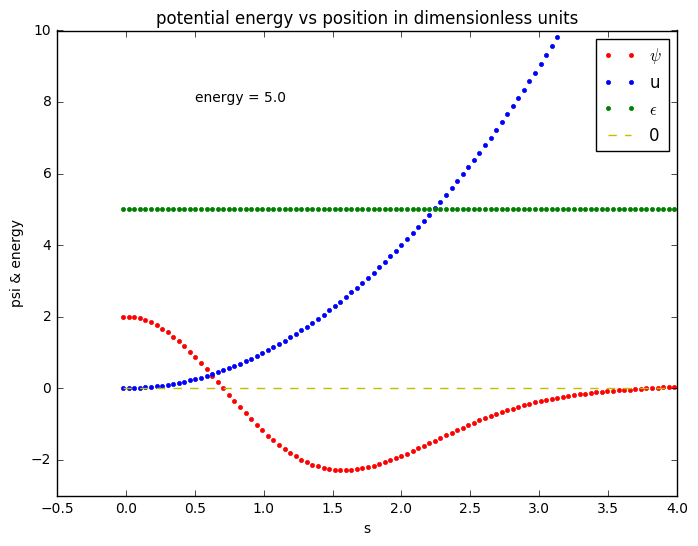

In [98]:
# One more picture - to see explicitly the discrete lattice .
# Here I've plotted points rather than lines.
# And I've decreased N so that the points are enough apart to see on the graph.

# Initialize s, u, and psi, all as lists of N values.

N = 100        # number of points in discrete grid
s_max = 4.0        # maximum value of s

s = np.linspace(0.0, s_max, N)
ds = s[1] - s[0]
s = s - ds/2.0         # Make the 1st two values symmetric around s=0

u = s**2                        # The potential energy at those values for s.

# Pick a value for the energy
energy = 5.0

# Initialize psi.
psi = np.zeros(N)               # Allocate space for the wavefunction, all 0 to start
psi[0] = psi[1] = 2.0           # Set first two values of psi so that d(psi)/ds = 0  ,  psi(s) = psi(-s)

# Iterate over the difference equation to find the rest of the psi values.
for i in range(1, N-1):
    psi[i+1] = 2*psi[i] - psi[i-1] + ds**2 * ( u[i] - energy   ) * psi[i]
    
# Then make a picture.
plt.figure(dpi=200, figsize=(8,6))  # plot size in inches
plt.title("potential energy vs position in dimensionless units")
plt.xlabel("s")
plt.ylabel("psi & energy")
plt.text(0.5, 8, "energy = "+str(energy))
plt.ylim((-3.0, 10.0))
plt.plot(s, psi, 'r.')  # r => red
plt.plot(s, u, 'b.')    # b => blue
plt.plot(s, energy*np.ones(N), 'g.')  # g => green
plt.plot(s, np.zeros(N), 'y--')
plt.legend(["$\psi$", "u", "$\epsilon$", 0])
plt.show()
